## Набор данных о ежедневном потреблении воды и режиме гидратации

Целью этого проекта является прогнозирование и анализ состояния гидратации человека на основе демографических, физиологических и внешних факторов. Требуется построить модель бинарной классификации для прогнозирования уровня гидратации (достаточный/недостаточный) на основе различных характеристик индивида и условий окружающей среды.

### Подключение модулей

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import tensorflow as tf
from tensorflow import keras

### Загрузка данных

In [9]:
df = pd.read_csv('C:\\Users\\Камилла\\Desktop\\Daily_Water_Intake.csv')

In [10]:
df.head()

,Age,Gender,Weight (kg),Daily Water Intake (liters),Physical Activity Level,Weather,Hydration Level
0,56,Male,96,4.23,Moderate,Hot,Good
1,60,Male,105,3.95,High,Normal,Good
2,36,Male,68,2.39,Moderate,Cold,Good
3,19,Female,74,3.13,Moderate,Hot,Good
4,38,Male,77,2.11,Low,Normal,Poor


Данные содержат следующие столбцы:
- __Age__ : Возраст человека.
- __Gender__ : Пол (мужской/женский).
- __Weight (kg)__ : Масса тела, измеренная в килограммах.
- __Daily Water Intake (liters)__ : Общее суточное потребление воды в литрах.
- __Physical Activity Level__ :Интенсивность физической активности (низкая, умеренная, высокая).
- __Weather__ :Условия окружающей среды (жара, нормальная температура, холод).
- __Hydration Level__ :Уровень гидратации (хороший / плохой).

In [11]:
df.shape

(30000, 7)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          30000 non-null  int64  
 1   Gender                       30000 non-null  object 
 2   Weight (kg)                  30000 non-null  int64  
 3   Daily Water Intake (liters)  30000 non-null  float64
 4   Physical Activity Level      30000 non-null  object 
 5   Weather                      30000 non-null  object 
 6   Hydration Level              30000 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 1.6+ MB


In [13]:
print("Распределение классов:")
print(df['Hydration Level'].value_counts())
print("\nДоля классов:")
print(df['Hydration Level'].value_counts(normalize=True))

Распределение классов:
Hydration Level
Good    23915
Poor     6085
Name: count, dtype: int64

Доля классов:
Hydration Level
Good    0.797167
Poor    0.202833
Name: proportion, dtype: float64


In [14]:
df['target_Hydration'] = df['Hydration Level'].map({'Good': 1, 'Poor': 0})

In [16]:
df.describe()

,Age,Weight (kg),Daily Water Intake (liters),target_Hydration
count,30000.000000,30000.00000,30000.000000,30000.000000
mean,43.467667,76.84860,2.852444,0.797167
std,14.998940,18.74494,0.835537,0.402116
min,18.000000,45.00000,1.500000,0.000000
25%,30.000000,61.00000,2.220000,1.000000
50%,43.000000,77.00000,2.830000,1.000000
75%,56.000000,93.00000,3.440000,1.000000
max,69.000000,109.00000,5.430000,1.000000


In [17]:
df = df.drop('Hydration Level', axis=1)

In [18]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
label_encoders = {}
categorical_cols = ['Gender', 'Physical Activity Level', 'Weather']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [19]:
df.head()

,Age,Gender,Weight (kg),Daily Water Intake (liters),Physical Activity Level,Weather,target_Hydration
0,56,1,96,4.23,2,1,1
1,60,1,105,3.95,0,2,1
2,36,1,68,2.39,2,0,1
3,19,0,74,3.13,2,1,1
4,38,1,77,2.11,1,2,0


target_Hydration - 1-Хорошо, 0-плохо

gender- 1-мужскойж, 0-женский

Physical Activity Level- 2-умеренный, 1-низкий, 0-высокий

Weather -  2-нормальный, 1-горячий, 0-холодный


In [20]:
print("Пустые значения по столбцам:")
print(df.isnull().sum())

Пустые значения по столбцам:
Age                            0
Gender                         0
Weight (kg)                    0
Daily Water Intake (liters)    0
Physical Activity Level        0
Weather                        0
target_Hydration               0
dtype: int64


Пустых значений в данном наборе данных нет

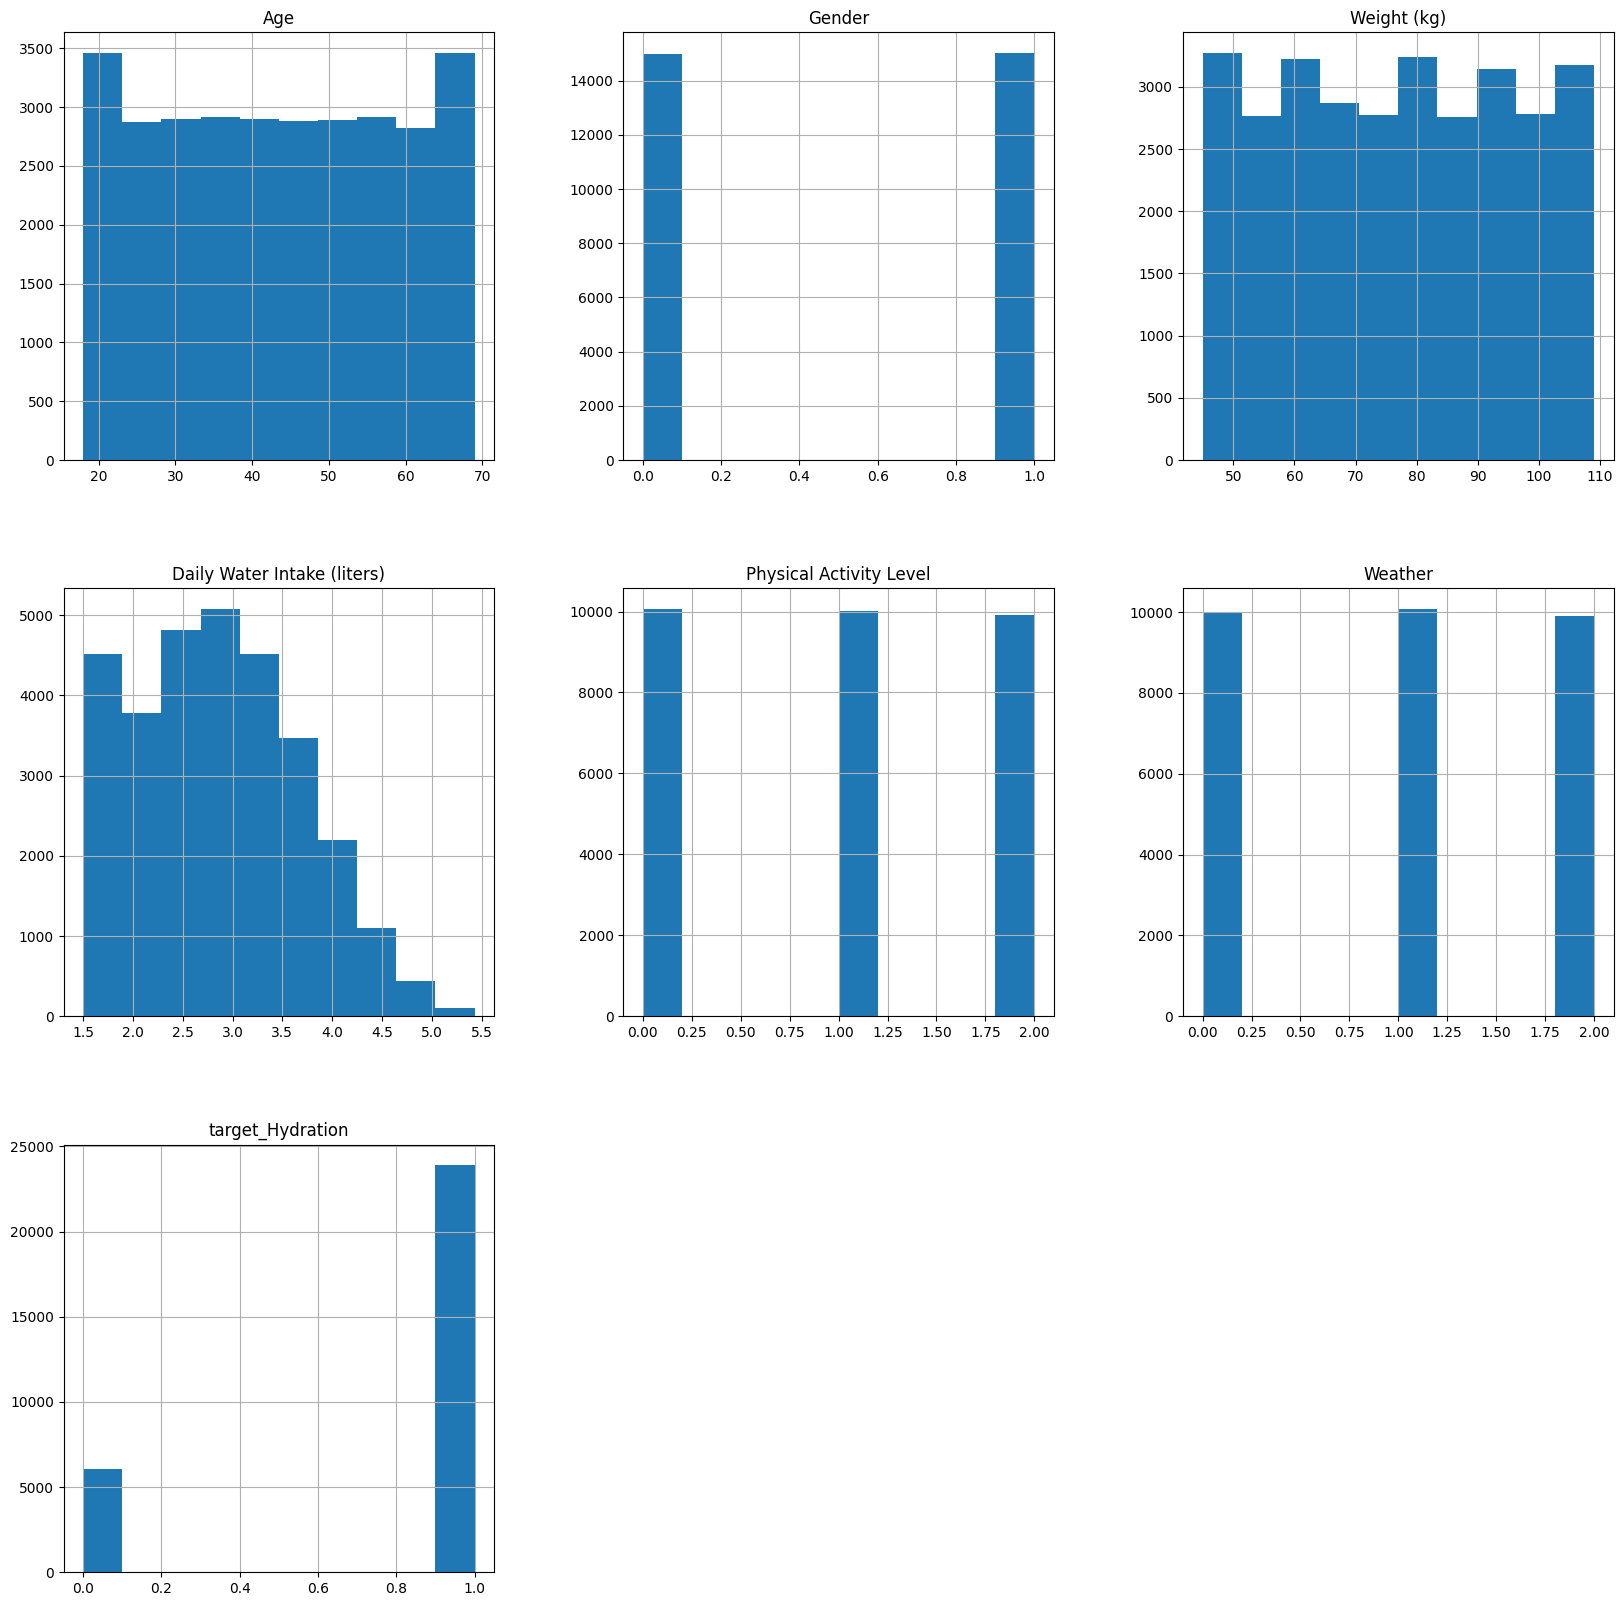

In [21]:
df.hist(figsize=(20,20));

Данные хорошо очищены нет выбросов или аномальных значений. Все признаки имеют реалистичные распределения - соответствуют ожидаемым паттернам реальных данных

<Figure size 800x600 with 0 Axes>

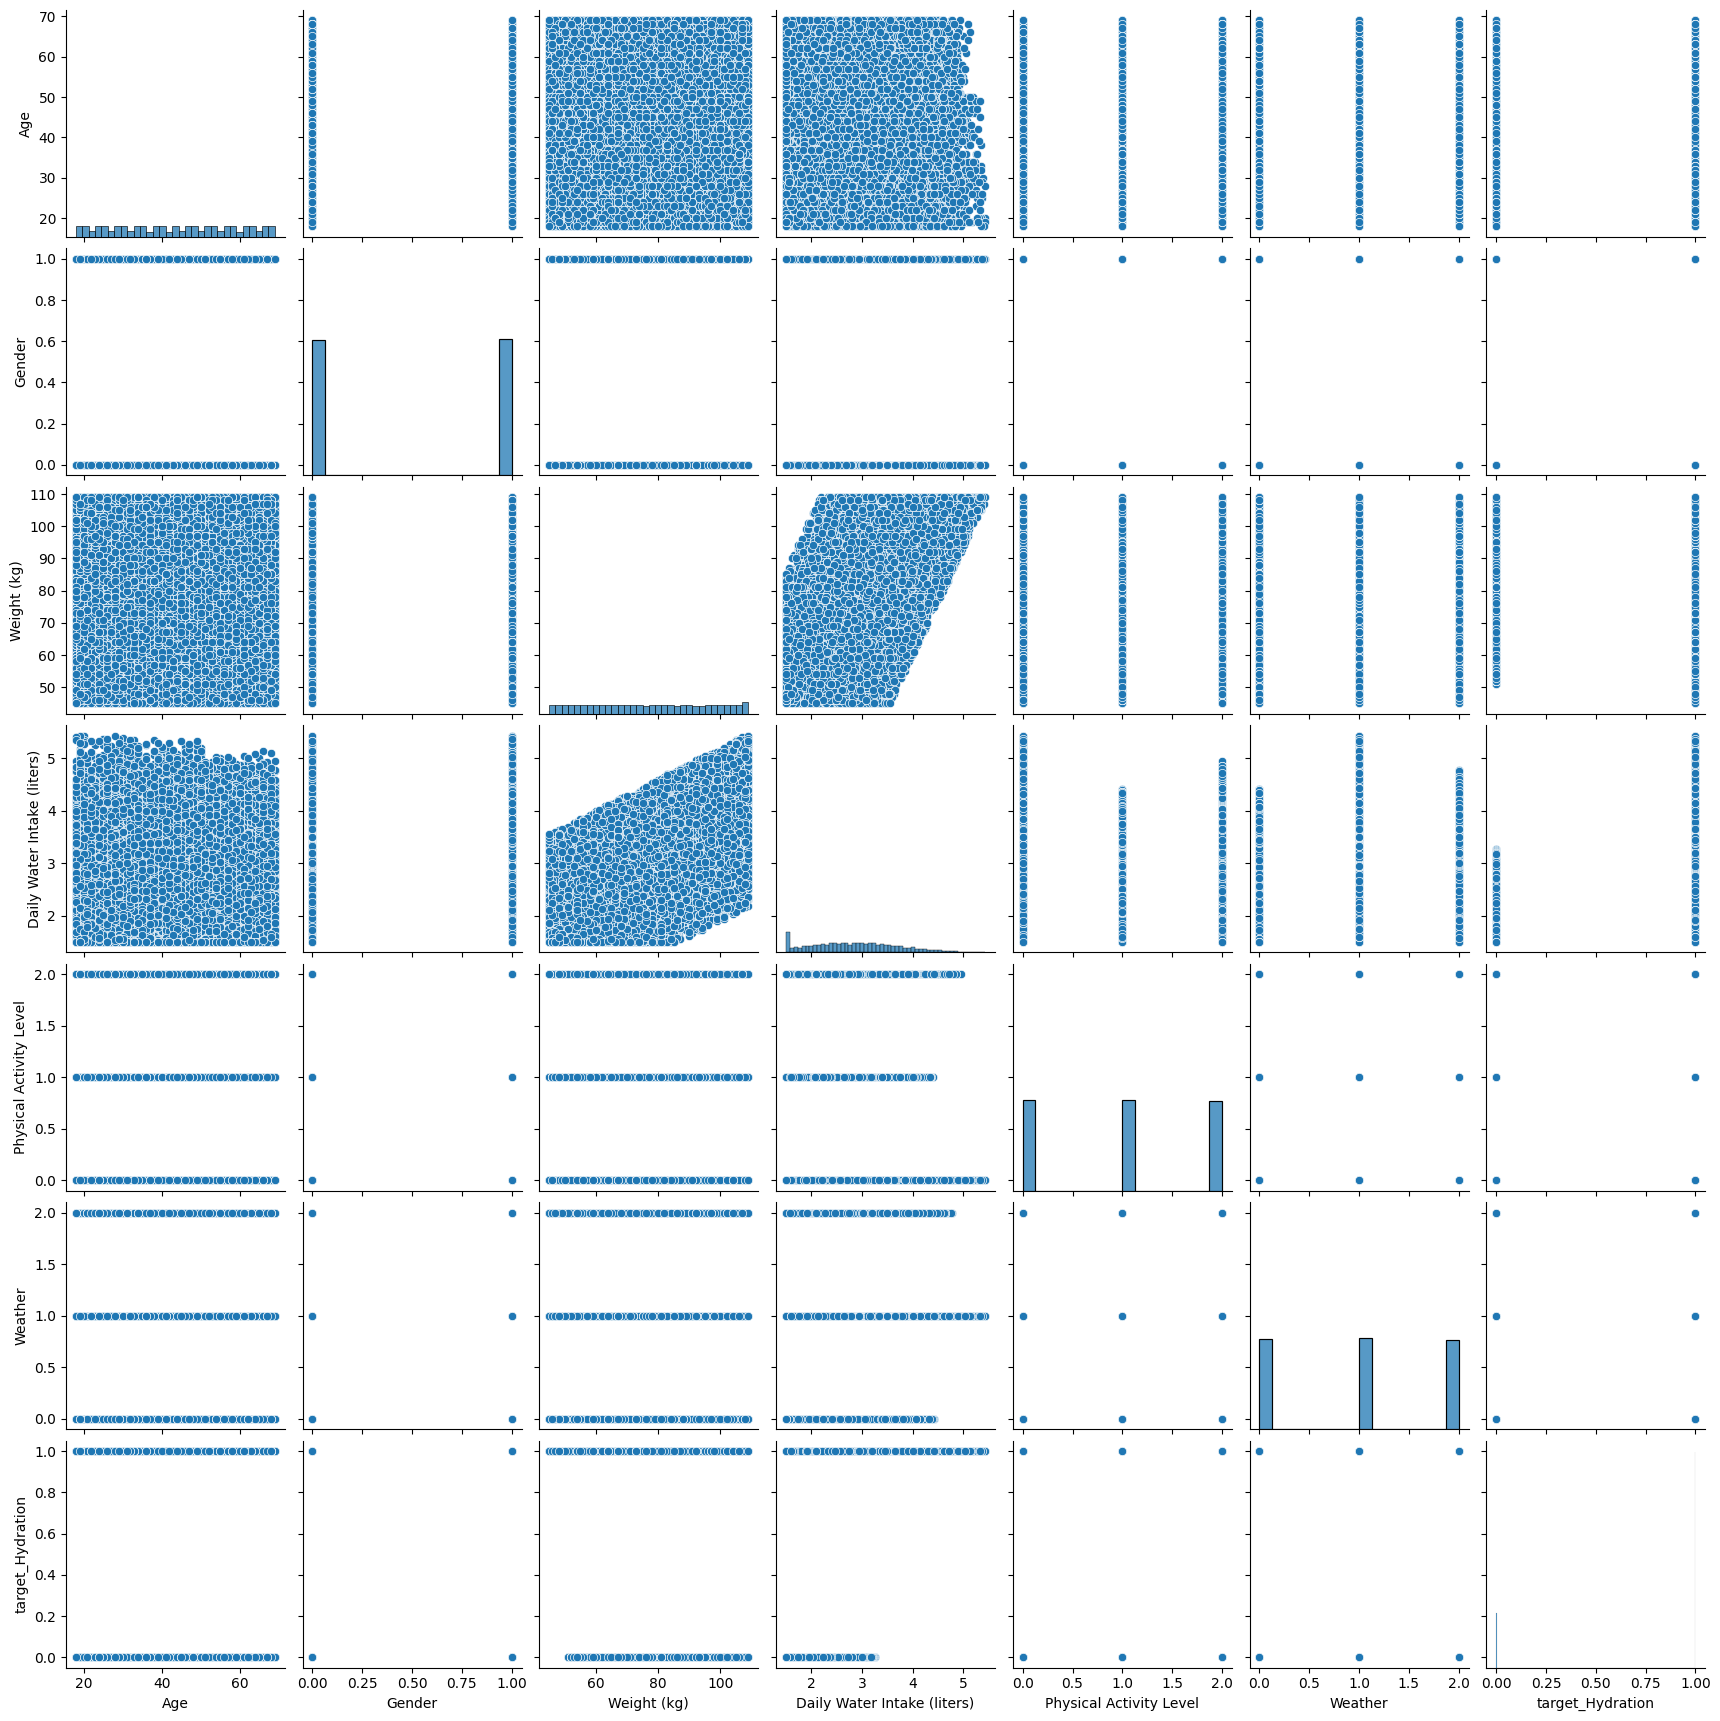

In [22]:
plt.figure(figsize=(8,6))
sns.pairplot(df)

In [23]:
df['target_Hydration'].value_counts()

target_Hydration
1    23915
0     6085
Name: count, dtype: int64

Кол-во записей о хорошей и плохой гидротации.

#### Нормализация числовых признаков

In [28]:
df_scaled = df.copy()

In [29]:
numerical_cols = ['Weight (kg)', 'Daily Water Intake (liters)', 'Age']
scaler = StandardScaler()
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

In [30]:
df_scaled.head()

,Age,Gender,Weight (kg),Daily Water Intake (liters),Physical Activity Level,Weather,target_Hydration
0,0.835562,1,1.021701,1.648735,2,1,1
1,1.102252,1,1.501838,1.313615,0,2,1
2,-0.497888,1,-0.472061,-0.553479,2,0,1
3,-1.631320,0,-0.151969,0.332194,2,1,1
4,-0.364543,1,0.008077,-0.888599,1,2,0


Мы провели нормализацию данных для числовых признаков, что стало не читаемым для человека, но для работы с нейросетями данный датасет станет отличным набором данных.

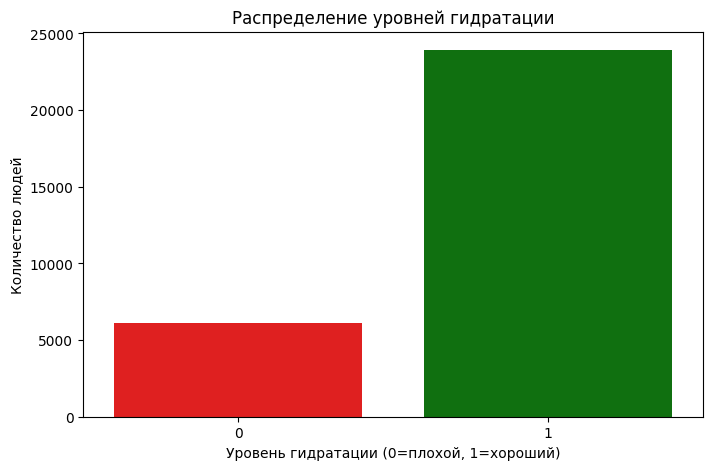

In [24]:
plt.figure(figsize=(8, 5))
sns.countplot(x='target_Hydration', data=df, palette=['red', 'green'])
plt.title('Распределение уровней гидратации')
plt.xlabel('Уровень гидратации (0=плохой, 1=хороший)')
plt.ylabel('Количество людей')
plt.show()

Посмотрели раницу в распределение уровня гидратации.

Text(0, 0.5, 'Количество людей')

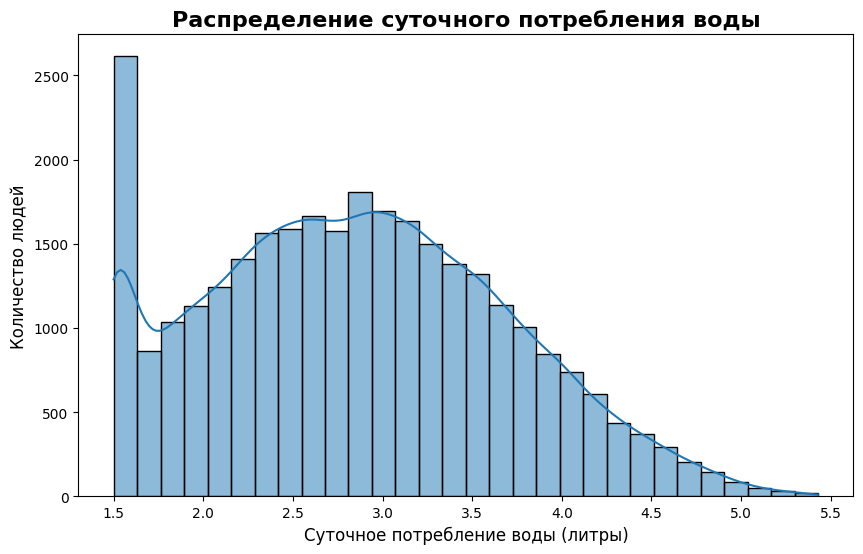

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Daily Water Intake (liters)'], kde=True, bins=30)
plt.title('Распределение суточного потребления воды', fontsize=16, fontweight='bold')
plt.xlabel('Суточное потребление воды (литры)', fontsize=12)
plt.ylabel('Количество людей', fontsize=12)

График показывающий какое кол-во людей, сколько пьют воды в день.

In [26]:
df[['Age', 'Gender', 'Weight (kg)', 'Daily Water Intake (liters)','Physical Activity Level', 'Weather', 'target_Hydration']].corr()

,Age,Gender,Weight (kg),Daily Water Intake (liters),Physical Activity Level,Weather,target_Hydration
Age,1.000000,-0.001676,-0.001245,-0.129692,-0.007181,0.000707,-0.124738
Gender,-0.001676,1.000000,-0.009767,-0.006058,-0.003540,-0.001832,-0.003317
Weight (kg),-0.001245,-0.009767,1.000000,0.645425,0.004001,0.004928,-0.081586
Daily Water Intake (liters),-0.129692,-0.006058,0.645425,1.000000,-0.241162,0.132469,0.457624
Physical Activity Level,-0.007181,-0.003540,0.004001,-0.241162,1.000000,0.000375,-0.153779
Weather,0.000707,-0.001832,0.004928,0.132469,0.000375,1.000000,0.173629
target_Hydration,-0.124738,-0.003317,-0.081586,0.457624,-0.153779,0.173629,1.000000


<Axes: >

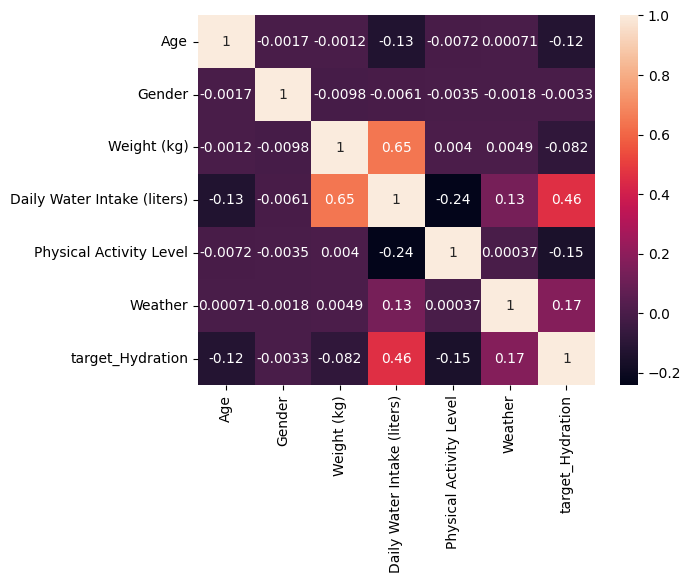

In [27]:
sns.heatmap(df[['Age', 'Gender', 'Weight (kg)', 'Daily Water Intake (liters)','Physical Activity Level', 'Weather', 'target_Hydration']].corr(), annot=True)

##### Вывели график матрицы корреляций, чтобы увидеть какие есть зависимости между признаками.

- Суточная потребление воды и Гидратация (0.46) — чем больше пьет, тем лучше гидратация;
- Вес и Суточная потребление воды (0.65) — люди с большим весом пьют больше воды на физиологически уровне так и есть;
- Погода и Гидратация (0.17) — в жару гидратация лучше.

# Обучение моделей

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [35]:
from sklearn.model_selection import train_test_split

In [32]:
df_scaled.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Daily Water Intake (liters)',
       'Physical Activity Level', 'Weather', 'target_Hydration'],
      dtype='object')

In [33]:
X = df_scaled.drop(['target_Hydration', 'Daily Water Intake (liters)'], axis=1)

Удалили признаки гидратации и суточного потребления воды, так как этот признак обладает чрезмерно высокой предсказательной силой и результаты обучения будут некорректными, модели могут быть переобучены. (Потребление воды почти напрямую определяет уровень гидратации).

In [34]:
y = df_scaled['target_Hydration'] 

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [37]:
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")
print(f"\nБаланс классов в y_train:")
print(y_train.value_counts(normalize=True))

X_train: (24000, 5), y_train: (24000,)
X_test: (6000, 5), y_test: (6000,)

Баланс классов в y_train:
target_Hydration
1    0.797167
0    0.202833
Name: proportion, dtype: float64


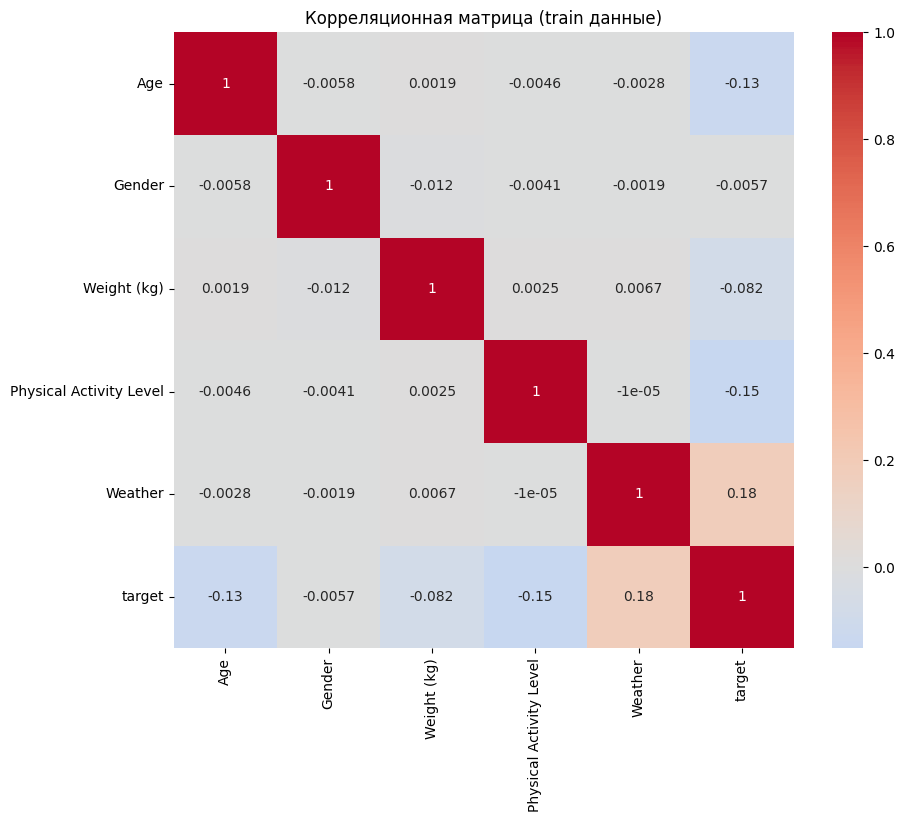


Корреляция с целевой переменной:
target                     1.000000
Weather                    0.176047
Gender                    -0.005710
Weight (kg)               -0.082192
Age                       -0.129527
Physical Activity Level   -0.151959
Name: target, dtype: float64


In [38]:
train_data = X_train.copy()
train_data['target'] = y_train.values

plt.figure(figsize=(10, 8))
correlation = train_data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Корреляционная матрица (train данные)')
plt.show()

print("\nКорреляция с целевой переменной:")
print(correlation['target'].sort_values(ascending=False))

Корреляции между признаками очень слабые близки к 0, признаки практически независимы друг от друга.
Это хороший признак для моделей, так как каждый признак вносит уникальную информацию

### Модель нейронной сети

In [154]:
from tensorflow.keras import layers

In [155]:
def create_neural_network(input_dim):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(input_dim,)),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()]
    )
    
    return model

In [156]:
print("Создание архитектуры нейросети...")
nn_model = create_neural_network(X_train.shape[1])
nn_model.summary()

Создание архитектуры нейросети...


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 64)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

4 слоя: 64 -> 32 -> 16 -> 1 нейронов

Всего параметров: 3,009 обучаемых весов

In [157]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [158]:
history = nn_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8170 - loss: 0.4032 - precision_4: 0.8275 - recall_4: 0.9733 - val_accuracy: 0.8592 - val_loss: 0.3013 - val_precision_4: 0.9045 - val_recall_4: 0.9206
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8573 - loss: 0.2971 - precision_4: 0.8981 - recall_4: 0.9260 - val_accuracy: 0.8825 - val_loss: 0.2584 - val_precision_4: 0.9227 - val_recall_4: 0.9306
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8698 - loss: 0.2701 - precision_4: 0.9179 - recall_4: 0.9189 - val_accuracy: 0.8820 - val_loss: 0.2437 - val_precision_4: 0.9294 - val_recall_4: 0.9220
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8786 - loss: 0.2533 - precision_4: 0.9234 - recall_4: 0.9245 - val_accuracy: 0.8830 - val_loss: 0.2400 - val_precision_4: 0.9300 - val_recall_4: 0.9226
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8788 - loss: 0.2493 - precision_4: 0.9205 - recall_4: 0.9

Провели обучение нейросетей на тренировачных данных в течение 100 эпох.

In [159]:
y_pred_nn = (nn_model.predict(X_test) > 0.5).astype(int)
y_pred_proba_nn = nn_model.predict(X_test)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step


Провели предсказания на тестовых данных

In [160]:
accuracy_nn = accuracy_score(y_test, y_pred_nn)
precision_nn = precision_score(y_test, y_pred_nn)
recall_nn = recall_score(y_test, y_pred_nn)
f1_nn = f1_score(y_test, y_pred_nn)
auc_nn = roc_auc_score(y_test, y_pred_proba_nn)

nn_results = {
    'accuracy': accuracy_nn,
    'precision': precision_nn,
    'recall': recall_nn,
    'f1': f1_nn,
    'auc': auc_nn,
}

print(f"Нейросеть результаты:")
print(f"  Accuracy: {accuracy_nn:.4f}")
print(f"  F1-Score: {f1_nn:.4f}")
print(f"  AUC-ROC: {auc_nn:.4f}")

Нейросеть результаты:
  Accuracy: 0.8910
  F1-Score: 0.9329
  AUC-ROC: 0.9500


- Accuracy: общая точность предсказаний показала - 0.89;
- F1-Score: сбалансированная метрика, учитывающая и precision, и recall - 0.93;
- AUC-ROC: качество разделения классов, чем ближе к 1, тем лучше - 0.95.

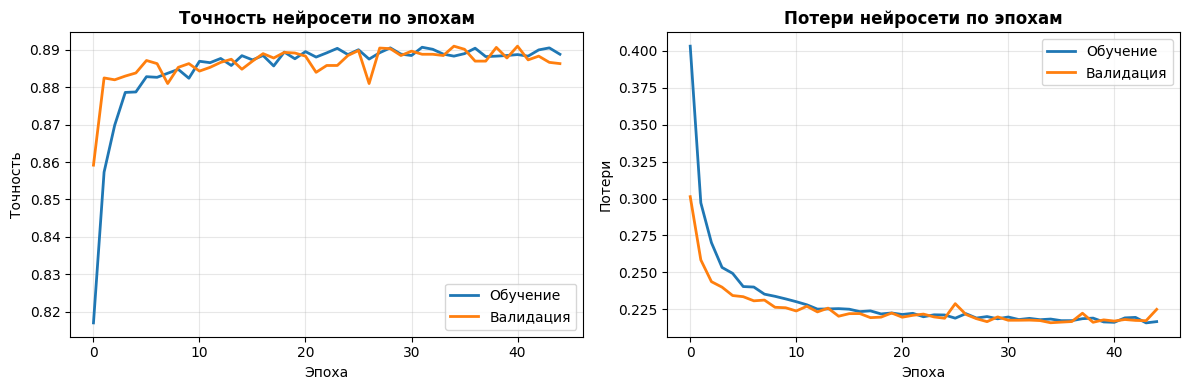

In [161]:

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# График точности
axes[0].plot(history.history['accuracy'], label='Обучение', linewidth=2)
axes[0].plot(history.history['val_accuracy'], label='Валидация', linewidth=2)
axes[0].set_title('Точность нейросети по эпохам', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Эпоха')
axes[0].set_ylabel('Точность')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# График потерь
axes[1].plot(history.history['loss'], label='Обучение', linewidth=2)
axes[1].plot(history.history['val_loss'], label='Валидация', linewidth=2)
axes[1].set_title('Потери нейросети по эпохам', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Эпоха')
axes[1].set_ylabel('Потери')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

- На графике точности мы видим, что точность на обеих выборках растёт и стабилизируется к ~0.87-0.88.
- На гравике потерь: потери уверенно снижаются на обеих выборках, что означает, что модель минимизирует ошибку.


Делая вывод можно сказать, что переобучения нет, и обучение можно было остановить раньше так как после 30 эпохи метрики более менее стабилизировались, и далее уже был незначительный прирост.


### Модель логистической регрессии

In [41]:
logistic_model = LogisticRegression(random_state=42, max_iter=1000)

In [42]:
logistic_model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multi

In [43]:
y_pred_lr = logistic_model.predict(X_test)
y_pred_proba_lr = logistic_model.predict_proba(X_test)[:, 1]

Провели обучение и предсказание.

In [44]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_pred_proba_lr)

Рассчитали метрики для работы модели

In [46]:
print(f"  Accuracy: {accuracy_lr:.4f}")
print(f"  Precision: {precision_lr:.4f}")
print(f"  Recall: {recall_lr:.4f}")
print(f"  F1-Score: {f1_lr:.4f}")
print(f"  AUC-ROC: {auc_lr:.4f}")


  Accuracy: 0.7975
  Precision: 0.8025
  Recall: 0.9895
  F1-Score: 0.8862
  AUC-ROC: 0.6876


- Хорошо справляется с задачей в целом (Accuracy) - 0.80;
- Надежна в предсказании положительного класса (Precision) - 0.80;
- Не пропускает важные случаи (Recall) - 0.99;
- Сбалансирована между точностью и полнотой (F1) - 0.87;
- Разделяет классы по вероятностям (AUC-ROC) - 0.69.

In [45]:
classical_results = {
    'Логистическая регрессия': {
        'accuracy': accuracy_lr,
        'precision': precision_lr,
        'recall': recall_lr,
        'f1': f1_lr,
        'auc': auc_lr
    }
}

In [47]:
print("\nМатрица ошибок (Логистическая регрессия):")
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)

print("\nКоэффициенты модели (важность признаков):")
feature_names = X_train.columns
coefficients = logistic_model.coef_[0]

feature_importance = pd.DataFrame({
    'Признак': feature_names,
    'Коэффициент': coefficients,
    'Абсолютное значение': abs(coefficients)
}).sort_values('Абсолютное значение', ascending=False)

print(feature_importance.to_string(index=False))


Матрица ошибок (Логистическая регрессия):
[[  52 1165]
 [  50 4733]]

Коэффициенты модели (важность признаков):
                Признак  Коэффициент  Абсолютное значение
                Weather     0.586857             0.586857
Physical Activity Level    -0.504227             0.504227
                    Age    -0.352139             0.352139
            Weight (kg)    -0.225867             0.225867
                 Gender    -0.042511             0.042511


Вывели матрицу ошибок, что позволяет понять, какой тип ошибок преобладает и провели анализ важности признаков, выявлены наиболее влиятельные признаки на предсказание

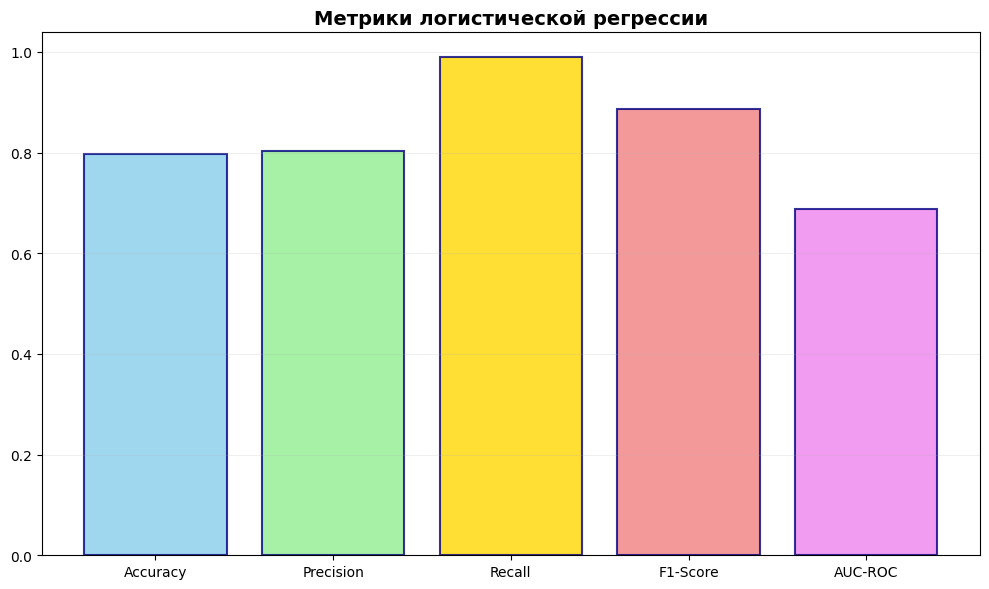

РЕЗУЛЬТАТЫ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ:
• Accuaracy: 79.75% (точность)
• Precision: 0.802 (точность для класса 1)
• Recall: 0.990 (полнота для класса 1)
• F1-Score: 0.886 (баланс точности и полноты)
• AUC-ROC: 0.688 (качество разделения классов)


In [71]:
plt.figure(figsize=(10, 6))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']
values = [accuracy_lr, precision_lr, recall_lr, f1_lr, auc_lr]

bars = plt.bar(metrics, values, color=colors, alpha=0.8, edgecolor='navy', linewidth=1.5)
plt.title('Метрики логистической регрессии', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.2, axis='y')

plt.tight_layout()
plt.show()


print("РЕЗУЛЬТАТЫ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ:")
print("="*50)
print(f"• Accuaracy: {accuracy_lr:.2%} (точность)")
print(f"• Precision: {precision_lr:.3f} (точность для класса 1)")
print(f"• Recall: {recall_lr:.3f} (полнота для класса 1)")
print(f"• F1-Score: {f1_lr:.3f} (баланс точности и полноты)")
print(f"• AUC-ROC: {auc_lr:.3f} (качество разделения классов)")

Вывели общий график метрик логистической регресси для наглядности.

### Модель стекинга

In [166]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [167]:
base_models = [
    ('lr', LogisticRegression(random_state=42, max_iter=1000)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svc', SVC(probability=True, random_state=42))
]

In [168]:
meta_model = LogisticRegression(random_state=42)

Определили базовые модели и выбрали мета-модель.

In [169]:
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,
    stack_method='predict_proba'
)


In [170]:
print("Обучение модели стекинга...")
stacking_model.fit(X_train, y_train)

y_pred_stack = stacking_model.predict(X_test)
y_pred_proba_stack = stacking_model.predict_proba(X_test)[:, 1]

Обучение модели стекинга...


Создали модель стекинга, произвели обучение и сделали предсказание.

In [171]:
accuracy_stack = accuracy_score(y_test, y_pred_stack)
precision_stack = precision_score(y_test, y_pred_stack)
recall_stack = recall_score(y_test, y_pred_stack)
f1_stack = f1_score(y_test, y_pred_stack)
auc_stack = roc_auc_score(y_test, y_pred_proba_stack)

print(f"Stacking результаты:")
print(f"  Accuracy: {accuracy_stack:.4f}")
print(f"  Precision: {precision_stack:.4f}")
print(f"  Recall: {recall_stack:.4f}")
print(f"  F1-Score: {f1_stack:.4f}")
print(f"  AUC-ROC: {auc_stack:.4f}")

Stacking результаты:
  Accuracy: 0.8845
  Precision: 0.9090
  Recall: 0.9502
  F1-Score: 0.9292
  AUC-ROC: 0.9416


Вычислили метрики и получили такие результаты:
- Accuracy: 0.88 - Общая точность;
- Precision: 0.9090 - Точность положительных предсказаний;
- Recall: 0.9502 - Полнота: модель находит 95% всех реальных положительных случаев;
- F1-Score: 0.9292 - Сбалансированная метрика, показывает высокий общий баланс качества;
- AUC-ROC: 0.9416 - Качество разделения классов: модель отлично отличает положительные примеры от отрицательных.

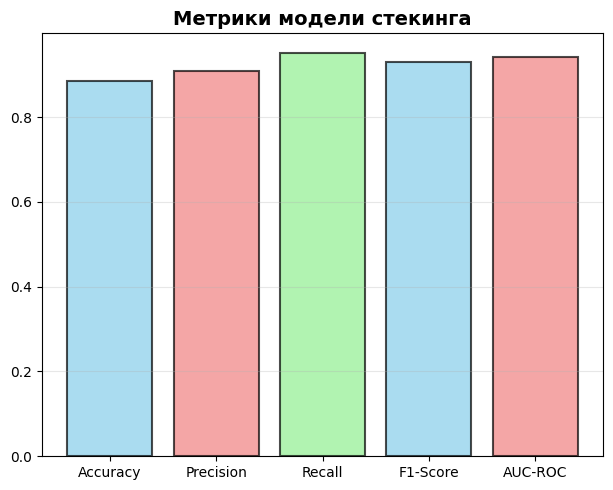


РЕЗУЛЬТАТЫ МОДЕЛИ СТЕКИНГА:
• Accuracy: 0.8845
• Precision: 0.9090
• Recall: 0.9502
• F1-Score: 0.9292
• AUC-ROC: 0.9416


In [172]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']
values = [accuracy_stack, precision_stack, recall_stack, f1_stack, auc_stack]

bars = plt.bar(metrics, values, alpha=0.7, color=colors, edgecolor='black', linewidth=1.5)

plt.title('Метрики модели стекинга', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("РЕЗУЛЬТАТЫ МОДЕЛИ СТЕКИНГА:")
print("="*60)
print(f"• Accuracy: {accuracy_stack:.4f}")
print(f"• Precision: {precision_stack:.4f}")
print(f"• Recall: {recall_stack:.4f}")
print(f"• F1-Score: {f1_stack:.4f}")
print(f"• AUC-ROC: {auc_stack:.4f}")


Вывели общий график метрик стекинга для наглядности.

## Сравнение 3 моделей

СРАВНЕНИЕ 3 МОДЕЛЕЙ
Модель                    Accuracy   F1-Score   AUC-ROC   
------------------------------------------------------------
Нейросеть                 0.8910     0.9329     0.9500    
Стекинг                   0.8845     0.9292     0.9416    
Логистическая регрессия   0.7975     0.8862     0.6876    
------------------------------------------------------------


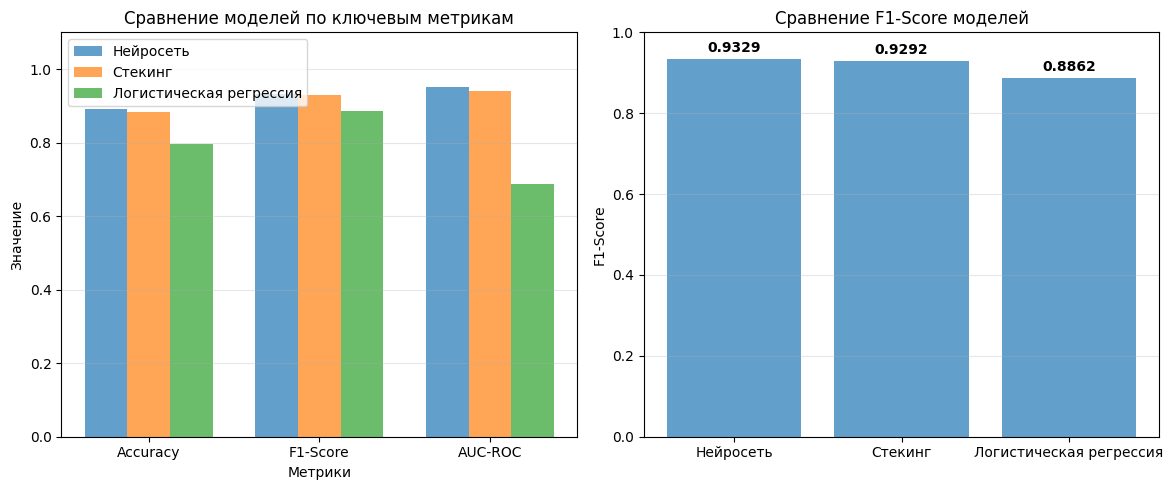

In [190]:
print("СРАВНЕНИЕ 3 МОДЕЛЕЙ")
print("="*60)
models_comparison = [
    ('Логистическая регрессия', accuracy_lr, precision_lr, recall_lr, f1_lr, auc_lr),
    ('Нейросеть', accuracy_nn, precision_nn, recall_nn, f1_nn, auc_nn),
    ('Стекинг', accuracy_stack, precision_stack, recall_stack, f1_stack, auc_stack)
]

models_comparison.sort(key=lambda x: x[5], reverse=True)

print(f"{'Модель':<25} {'Accuracy':<10} {'F1-Score':<10} {'AUC-ROC':<10}")
print("-"*60)

for name, acc, prec, rec, f1, auc in models_comparison:
    print(f"{name:<25} {acc:<10.4f} {f1:<10.4f} {auc:<10.4f}")

print("-"*60)
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
metrics = ['Accuracy', 'F1-Score', 'AUC-ROC']
model_names = [m[0] for m in models_comparison]

x = np.arange(len(metrics))
width = 0.25
for i, (name, acc, prec, rec, f1, auc) in enumerate(models_comparison):
    values = [acc, f1, auc]
    plt.bar(x + i*width, values, width, label=name, alpha=0.7)

plt.xlabel('Метрики')
plt.ylabel('Значение')
plt.title('Сравнение моделей по ключевым метрикам')
plt.xticks(x + width, metrics)
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.ylim(0, 1.1)


plt.subplot(1, 2, 2)
f1_values = [m[4] for m in models_comparison]
bars = plt.bar(model_names, f1_values, alpha=0.7)
plt.ylabel('F1-Score')
plt.title('Сравнение F1-Score моделей')
plt.ylim(0, 1.0)
plt.grid(True, alpha=0.3, axis='y')

for bar, val in zip(bars, f1_values):
    plt.text(bar.get_x() + bar.get_width()/2, val + 0.01,
             f'{val:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## ВЫВОД:

- Нейросеть показала наилучшие результаты по всем ключевым метрикам, подтверждая свою эффективность для данной задачи.

- Все слои обучаются совместно и согласованно end-to-end. Нейросети хорошо масштабируются с ростом объема данных.

Благодаря своей способности нейросеть, может автономно выявлять сложные, иерархические закономерности в данных, которые ансамбли моделей улавливают лишь частично, а линейные модели - практически не улавливают. Это видно по AUC-ROC (0.9560), что указывает на превосходное вероятностное моделирование.